# Pick a target and energy that KDUQ should be fit to, and see if our prior looks somewhat similar

In [136]:
import pickle

import numpy as np

In [137]:
neutron = (1, 0)
proton = (1, 1)

In [138]:
from jitr.reactions import ElasticReaction

In [139]:
from jitr.optical_potentials import kduq

In [140]:
import rxmc
import elm

In [141]:
with open("./prior_distribution.pickle", "rb") as f:
    prior = pickle.load(f)
prior_samples = rxmc.params.array_to_list(prior.rvs(1000), elm.params)

In [142]:
target = (40, 20)
projectile = neutron
energy_lab = 100
rxn = ElasticReaction(target=target, projectile=projectile)

In [143]:
kduq_samples = kduq.get_samples_federal(projectile)

In [144]:
kinematics = rxn.kinematics(energy_lab)
kinematics

ChannelKinematics(Elab=100, Ecm=97.53745605430512, mu=np.float64(1007.6720298321881), k=np.float64(2.193384770954192), eta=np.float64(0.0))

In [145]:
elm_prior_params = [
    elm.elm.calculate_parameters(projectile, target, kinematics.Ecm, rxn.Ef, p)
    for p in prior_samples
]

In [146]:
isoscalar, isovector, so0, so1, coul, asym = (
    np.array(l) for l in zip(*elm_prior_params)
)

In [147]:
np.mean(asym) * np.mean(isovector[:,:3], axis=0)

array([0., 0., 0.])

In [148]:
kduq_params = [
    kduq.calculate_params(projectile, target, kinematics.Elab, p) for p in kduq_samples
]

In [149]:
kduq_coul, kduq_central, kduq_so = (np.array(l) for l in zip(*kduq_params))

In [150]:
np.mean(kduq_central, axis=0)

array([26.38605059,  3.98116843,  0.67744189, 11.16166646,  3.98116843,
        0.67744189,  0.95771457,  4.42616682,  0.56072929])

In [151]:
np.mean(isoscalar, axis=0)

array([16.62479224,  9.4746472 ,  8.6763912 ,  3.90240948,  0.72974723,
        3.90240948,  0.72974723])

In [152]:
np.mean(isovector, axis=0)

array([ 4.12481992,  0.03661003, 22.3805833 ,  3.90365259,  0.72952374,
        3.90365259,  0.72952374])

In [153]:
np.mean(kduq_so, axis=0)

array([ 3.01710951,  3.48486319,  0.57430756, -0.62471753,  3.48486319,
        0.57430756])

In [154]:
np.mean(so0, axis=0)

array([5.58      , 0.        , 3.90240948, 0.72974723])

In [155]:
np.mean(so1, axis=0)

array([0.        , 0.        , 3.90365259, 0.72952374])

In [156]:
np.mean(coul, axis=0)

array([20.        ,  3.90240948])

In [157]:
np.mean(asym, axis=0)

np.float64(0.0)

In [158]:
np.std(isoscalar, axis=0)

array([3.1664073 , 3.67882004, 3.1155914 , 0.10527471, 0.02482164,
       0.10527471, 0.02482164])

In [159]:
np.std(isovector, axis=0)

array([1.96362381, 9.88043602, 8.36474135, 0.10476824, 0.02551352,
       0.10476824, 0.02551352])

In [160]:
np.std(so0, axis=0)

array([5.59552404e-14, 0.00000000e+00, 1.05274707e-01, 2.48216378e-02])

In [161]:
np.std(so1, axis=0)

array([0.        , 0.        , 0.10476824, 0.02551352])

In [162]:
np.std(coul, axis=0)

array([0.        , 0.10527471])

In [163]:
np.std(asym, axis=0)

np.float64(0.0)

In [164]:
r = np.linspace(0.1, 10, 100)
vso_kduq = kduq.spin_orbit(r, *np.mean(kduq_so, axis=0))
vso_elm = elm.spin_orbit(r, np.mean(asym), np.mean(so0, axis=0), np.mean(so1, axis=0))

vcentral_kduq = kduq.central(r, *np.mean(kduq_central, axis=0))
vcentral_elm = elm.central(r, np.mean(asym), np.mean(isoscalar, axis=0), np.mean(isovector,  axis=0) )

In [165]:
from matplotlib import pyplot as plt

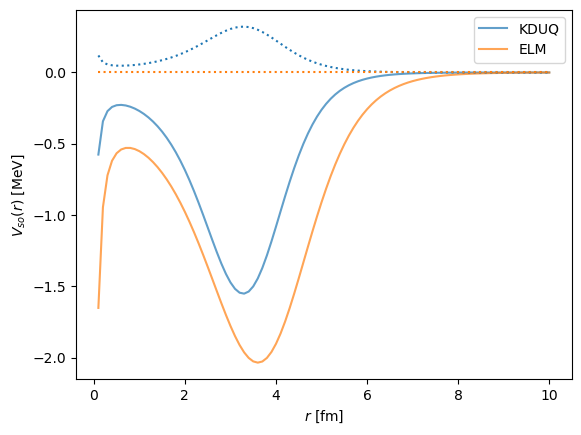

In [166]:
(p1,) = plt.plot(r, vso_kduq.real, alpha=0.7, label="KDUQ")
(p2,) = plt.plot(r, vso_elm.real, alpha=0.7, label="ELM")
plt.plot(r, vso_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vso_elm.imag, ":", color=p2.get_color())
plt.ylabel(r"$V_{so}(r)$ [MeV]")
plt.xlabel(r"$r$ [fm]")

plt.legend()

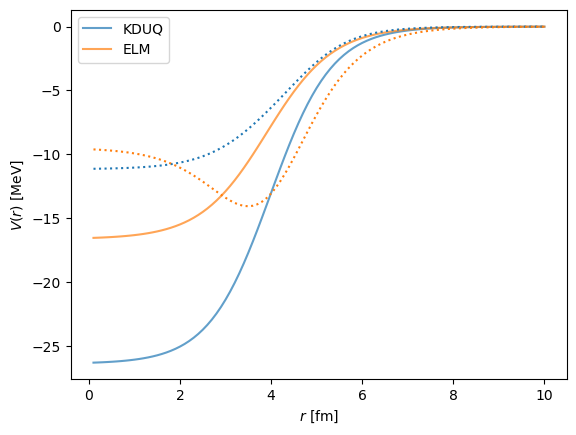

In [167]:
(p1,) = plt.plot(r, vcentral_kduq.real, alpha=0.7, label="KDUQ")
(p2,) = plt.plot(r, vcentral_elm.real, alpha=0.7, label="ELM")
plt.plot(r, vcentral_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vcentral_elm.imag, ":", color=p2.get_color())
plt.ylabel(r"$V(r)$ [MeV]")
plt.xlabel(r"$r$ [fm]")
plt.legend()